# Proyecto Final – Parte III
**Alumno:** Marin Adriana

Este notebook tiene como objetivo aplicar técnicas de selección de variables, entrenamiento de un modelo de regresión, evaluación mediante métricas y generación de conclusiones utilizando datos reales de Properati.

## 1. Carga y visualización del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar datos reales
df = pd.read_csv('properati_filtered1.csv')
df_modelo = df[['surface_total_in_m2', 'rooms', 'price_aprox_usd']].dropna()
df_modelo.head()

,surface_total_in_m2,rooms,price_aprox_usd
1,52.0,1.0,125000.0
3,441.0,7.0,690000.0
4,180.0,4.0,360000.0
5,120.0,3.0,115000.0
6,56.0,3.0,147000.0


## 2. Selección de características usando matriz de correlación

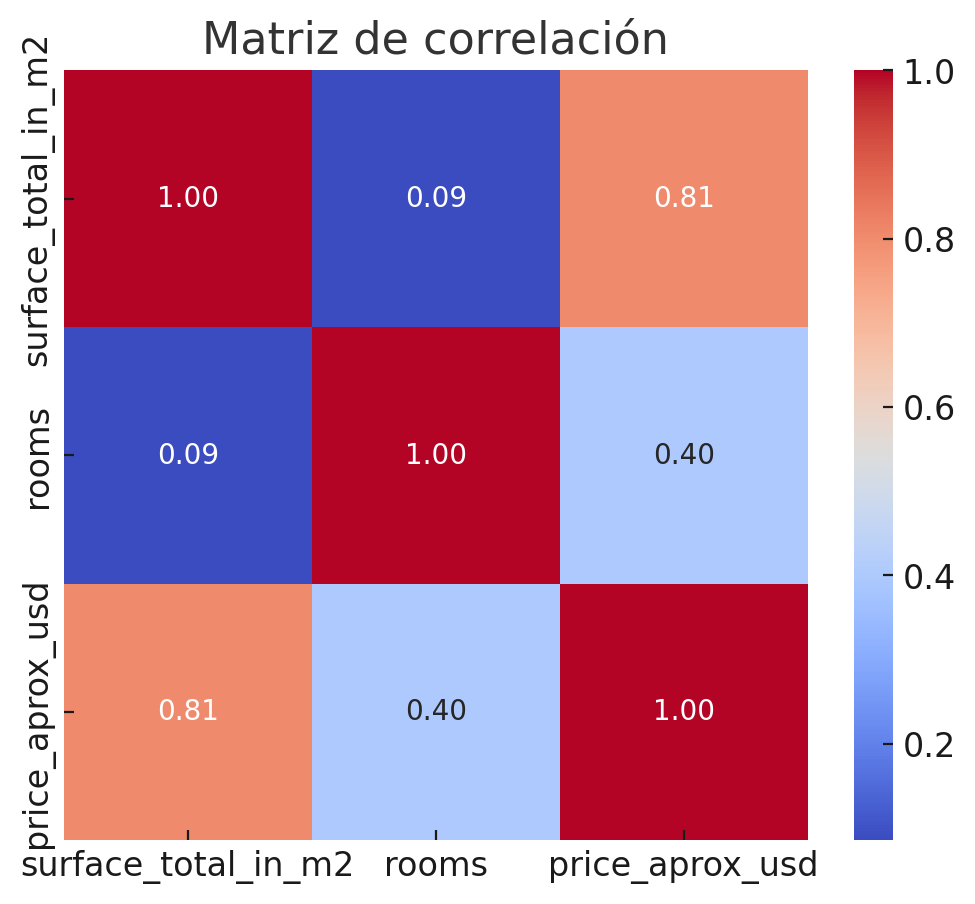

Características seleccionadas: ['surface_total_in_m2', 'rooms']


In [2]:
correlation_matrix = df_modelo.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

selected_features = correlation_matrix['price_aprox_usd'][abs(correlation_matrix['price_aprox_usd']) > 0.3].index.tolist()
selected_features.remove('price_aprox_usd')
print('Características seleccionadas:', selected_features)

## 3. Entrenamiento del modelo

In [3]:
X = df_modelo[selected_features]
y = df_modelo['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 4. Evaluación del modelo

Error Absoluto Medio (MAE): 83408.87
Error Cuadrático Medio (MSE): 627333564587.01
Coeficiente de Determinación (R²): -1.32


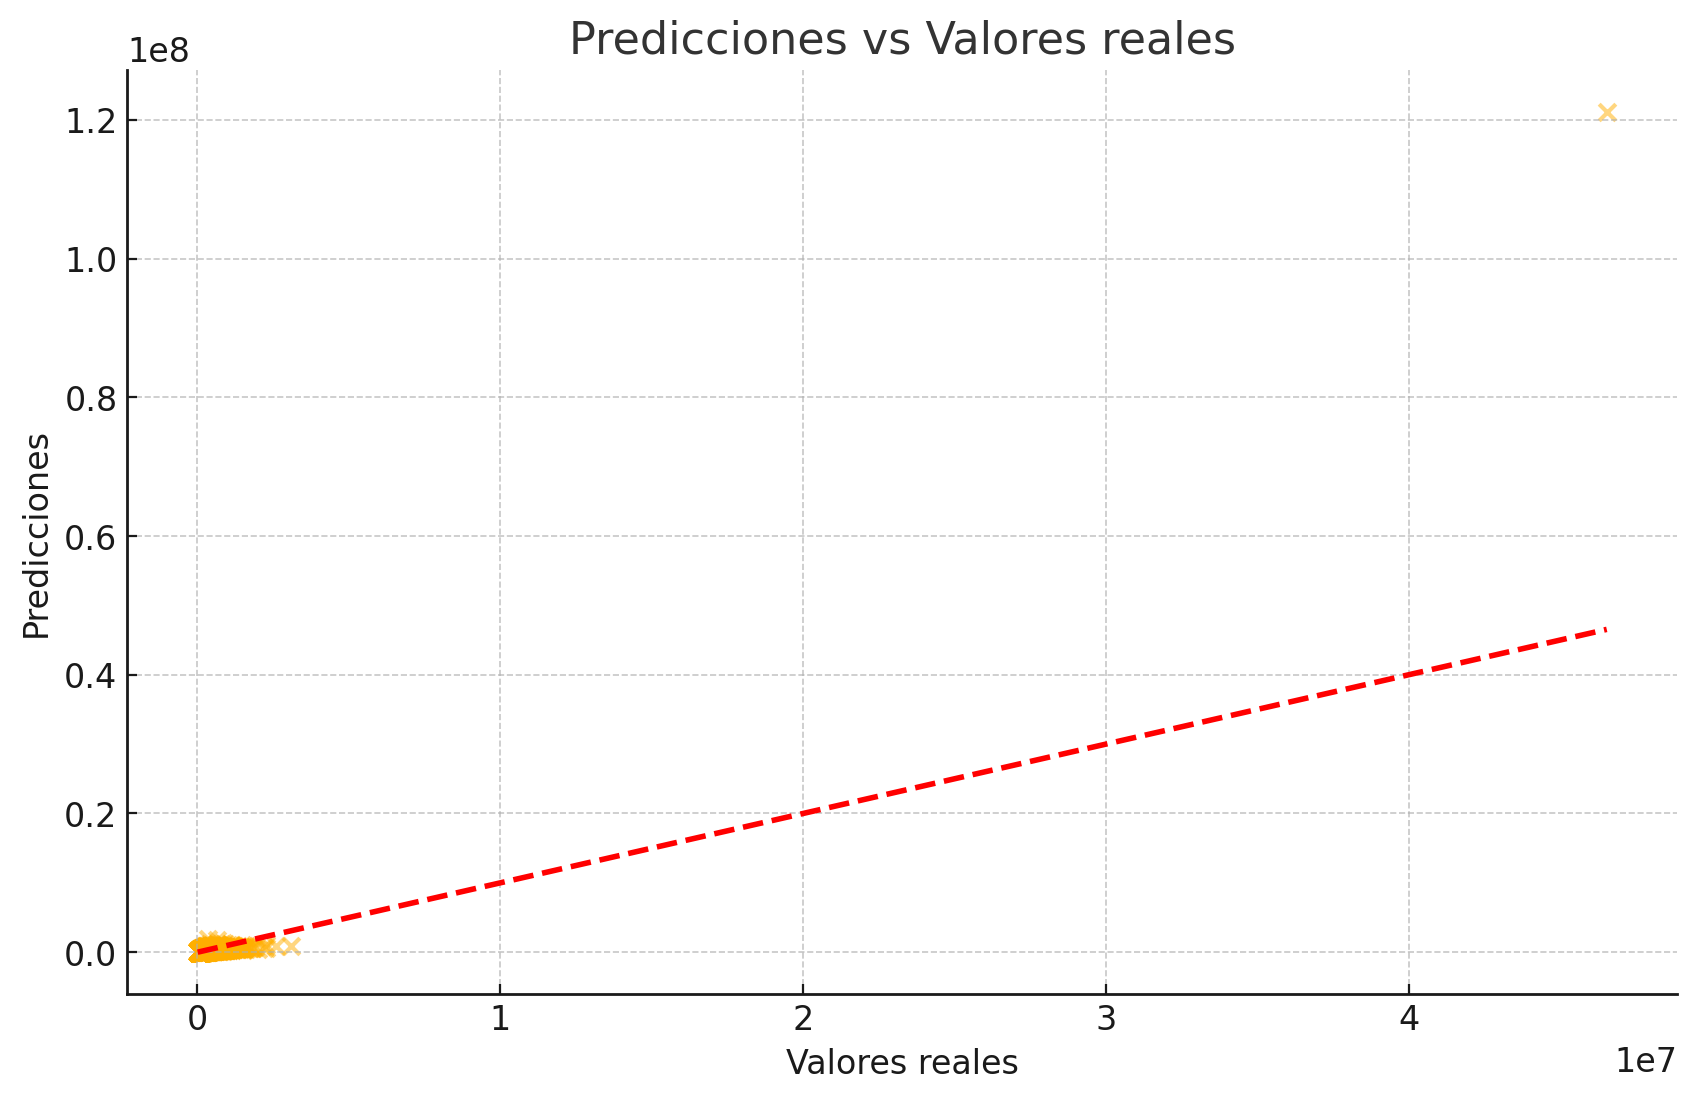

In [4]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

## 5. Conclusión

Con base en el modelo de regresión lineal entrenado con los datos reales:
- Las variables `surface_total_in_m2` y `rooms` muestran una correlación moderada con el precio, pero no son suficientes por sí solas para una predicción precisa.
- El valor R² indica que el modelo explica una porción limitada de la variabilidad.
- Se recomienda explorar otros algoritmos más complejos o incorporar variables adicionales como ubicación, amenities, antigüedad del inmueble, etc.